In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set use_inf_as_na to True
pd.set_option('mode.use_inf_as_na', True)

C:\Users\abhip\AppData\Local\Temp\ipykernel_41744\400836675.py:7: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
#check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# shape of dataset -> records, columns
df.shape

(374, 13)

In [6]:
# check missing values
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
# droping the person ID column
df.drop("Person ID", axis=1, inplace=True)

In [8]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 2


In [9]:
#spliting the blood pressure into two columns
df['max_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0]).astype(int)
df['min_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1]).astype(int)

In [10]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,max_bp,min_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [11]:
# droping the blood pressure column
df.drop("Blood Pressure", axis=1, inplace=True)

In [12]:
# checking BMI category
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [13]:
# replacing normal weight to normal
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [14]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [15]:
# filling nan values with None or missing in the dependent feature
df['Sleep Disorder'].fillna("None", inplace=True)

In [16]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [17]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,max_bp,min_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


# Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

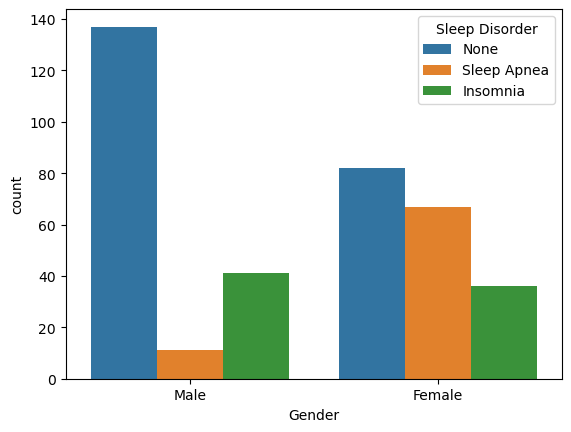

In [65]:
sns.countplot(x="Gender", data=df, hue='Sleep Disorder')

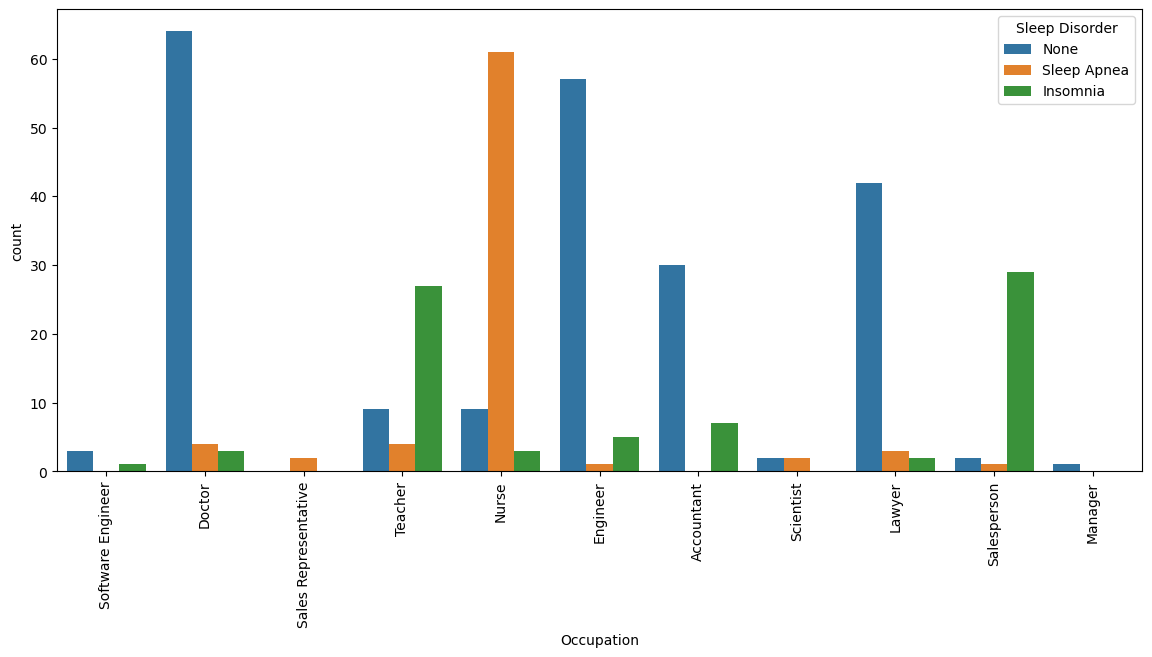

In [66]:
plt.figure(figsize=(14, 6))
axis=sns.countplot(x="Occupation", data=df, hue='Sleep Disorder')
axis.set_xticklabels(axis.get_xticklabels(), rotation = 90);

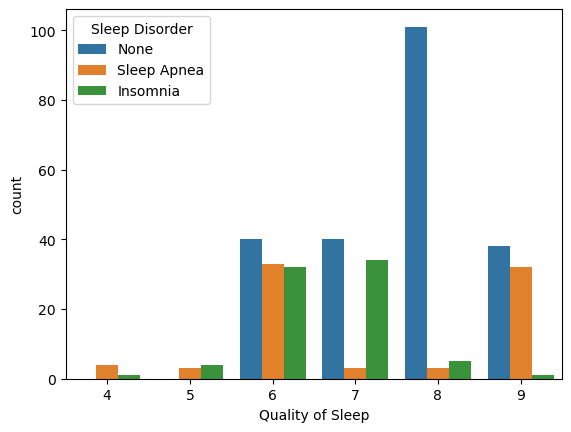

In [67]:
sns.countplot(x="Quality of Sleep", data=df, hue="Sleep Disorder");

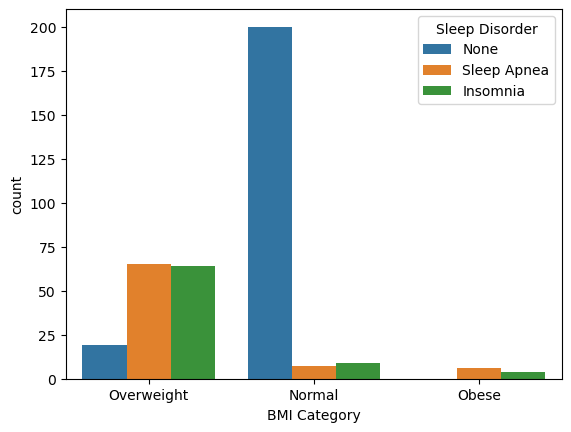

In [68]:
sns.countplot(x="BMI Category", data=df, hue="Sleep Disorder");

<Axes: xlabel='Stress Level', ylabel='count'>

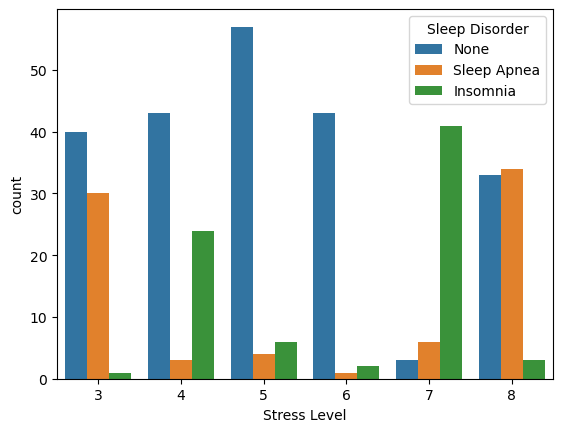

In [69]:
sns.countplot(x = 'Stress Level', data = df, hue="Sleep Disorder")

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


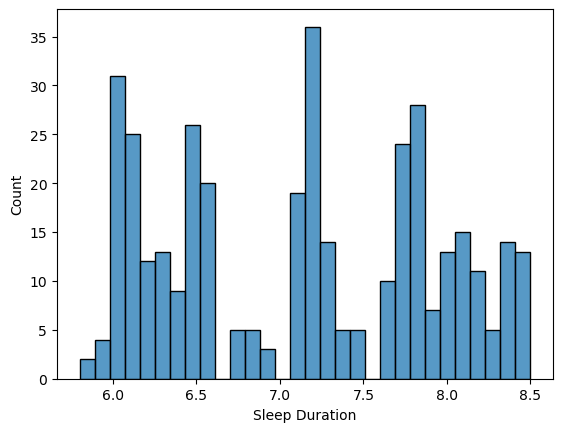

In [70]:
sns.histplot(x='Sleep Duration', data=df, bins=30);

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


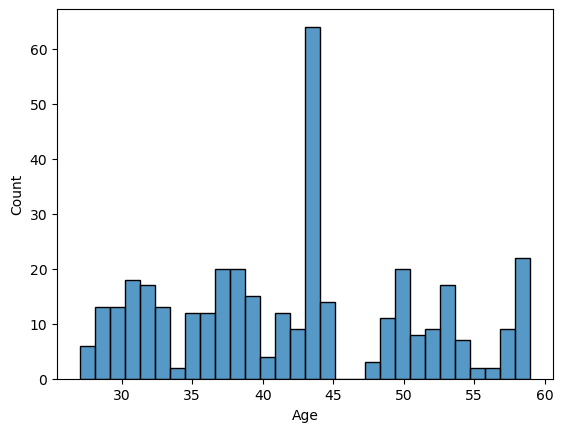

In [71]:
sns.histplot(x='Age', data=df, bins=30);

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Physical Activity Level', ylabel='Count'>

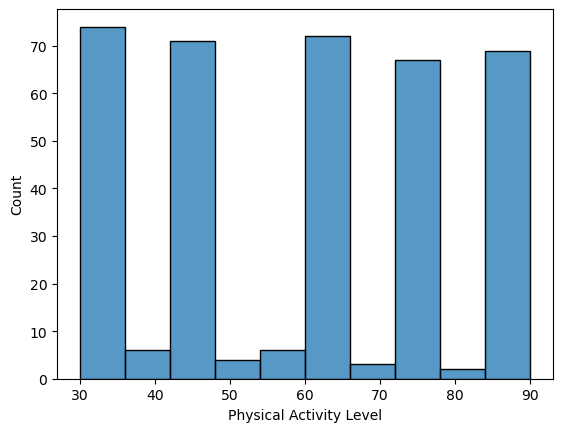

In [72]:
sns.histplot(x="Physical Activity Level", data=df)

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Steps', ylabel='Count'>

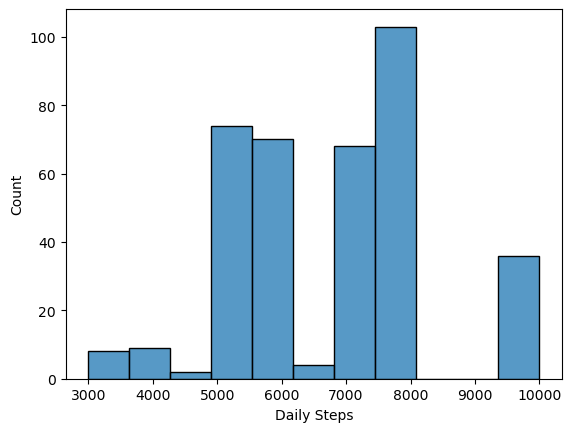

In [73]:
sns.histplot(x = 'Daily Steps', data = df)

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Heart Rate', ylabel='Count'>

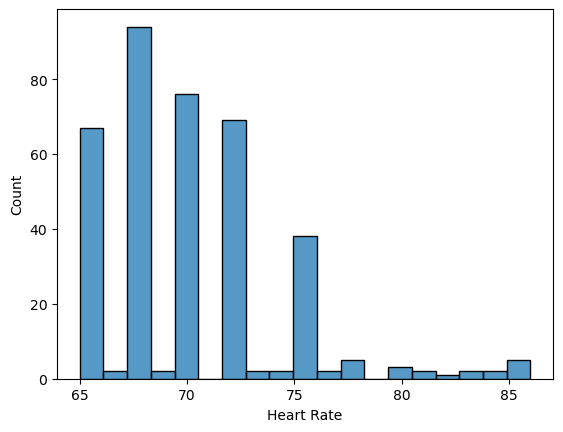

In [74]:
sns.histplot(x = 'Heart Rate', data = df)

# Observations
- The dataset is well-balanced in terms of gender distribution, with a slight majority of males.
- The majority of individuals in the dataset are in the age range of 30-49 years, which is typically considered a productive age group.
- The dataset covers a diverse range of occupations, with a significant representation of healthcare professionals (doctors and nurses) and individuals in professional roles (engineers, lawyers, and accountants).
- Most individuals in the dataset report getting between 6-8 hours of sleep, which is generally considered a healthy sleep duration range.
- The majority of individuals report having high-quality sleep, with an average quality score of 7.0 out of 9.
- The stress levels also show considerable variation, with an average of 5.7 on a scale of 3 to 8.
- Approximately half of the individuals in the dataset have a normal weight, while the remaining individuals are either overweight or obese.
- The average blood pressure and heart rate values fall within the normal range, suggesting a generally healthy population in the dataset.
- Sleep disorders are present in a substantial portion of the dataset, with sleep apnea being the most prevalent (26.5%), followed by insomnia (11.2%).

In [18]:
df["Gender"].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [19]:
gender = {"Male":1, "Female":0}

In [20]:
df["Gender"]=df["Gender"].map(gender)

In [21]:
df["Occupation"].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [22]:
occup = {"Nurse":1, "Doctor":2, "Engineer":3, "Lawyer":4,"Teacher":5, "Accountant":6, "Salesperson":7, "Software Engineer":8, "Scientist":9, "Sales Representative":10,"Manager":11}

In [23]:
df["Occupation"]=df["Occupation"].map(occup)

In [24]:
df["BMI Category"].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [25]:
bmi = {"Normal":1, "Overweight":2, "Obese":3}

In [26]:
df["BMI Category"]=df["BMI Category"].map(bmi)

In [27]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [28]:
output = {"None":0,"Sleep Apnea":1, "Insomnia":2}

In [29]:
df["Sleep Disorder"]=df["Sleep Disorder"].map(output)

<Axes: >

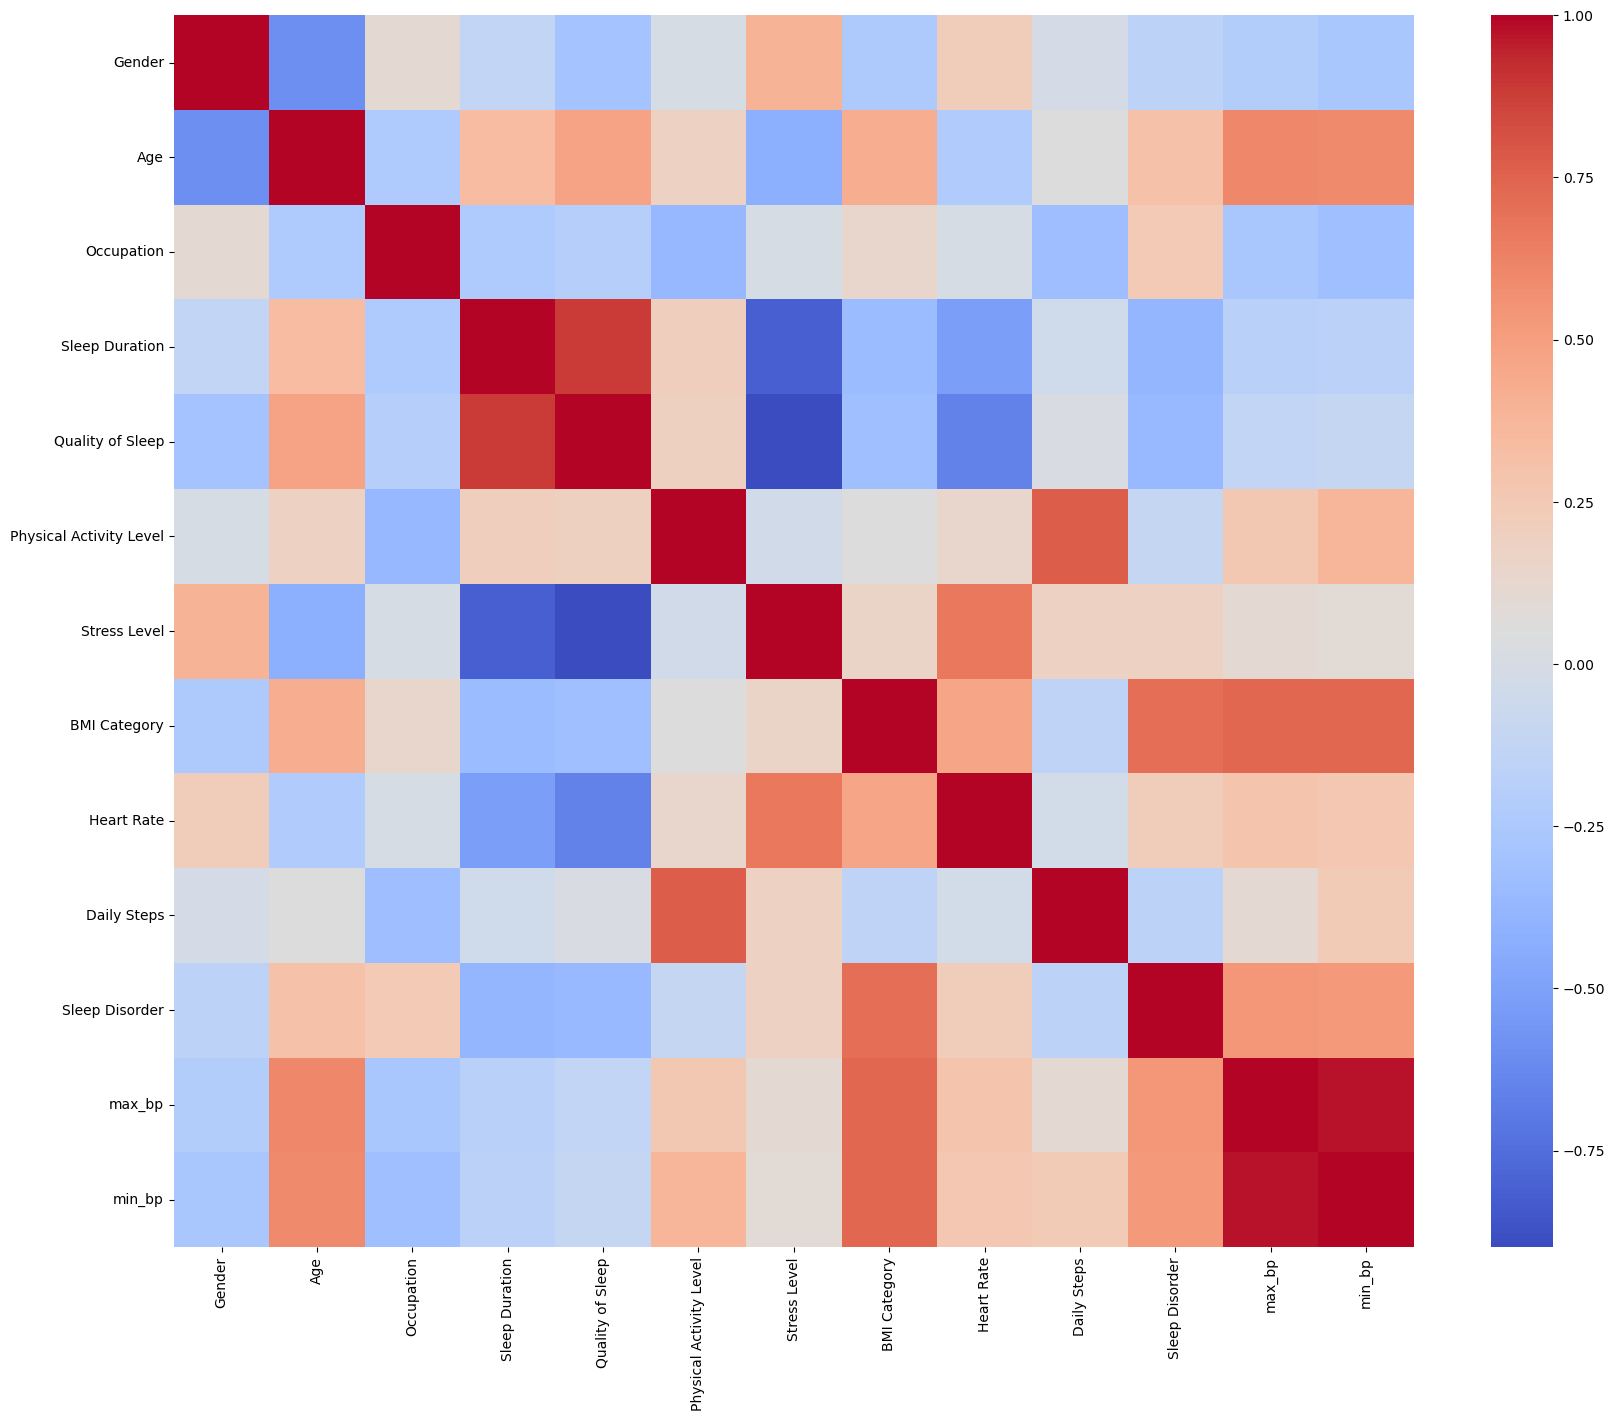

In [30]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), cmap = 'coolwarm')

C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhip\miniconda3\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

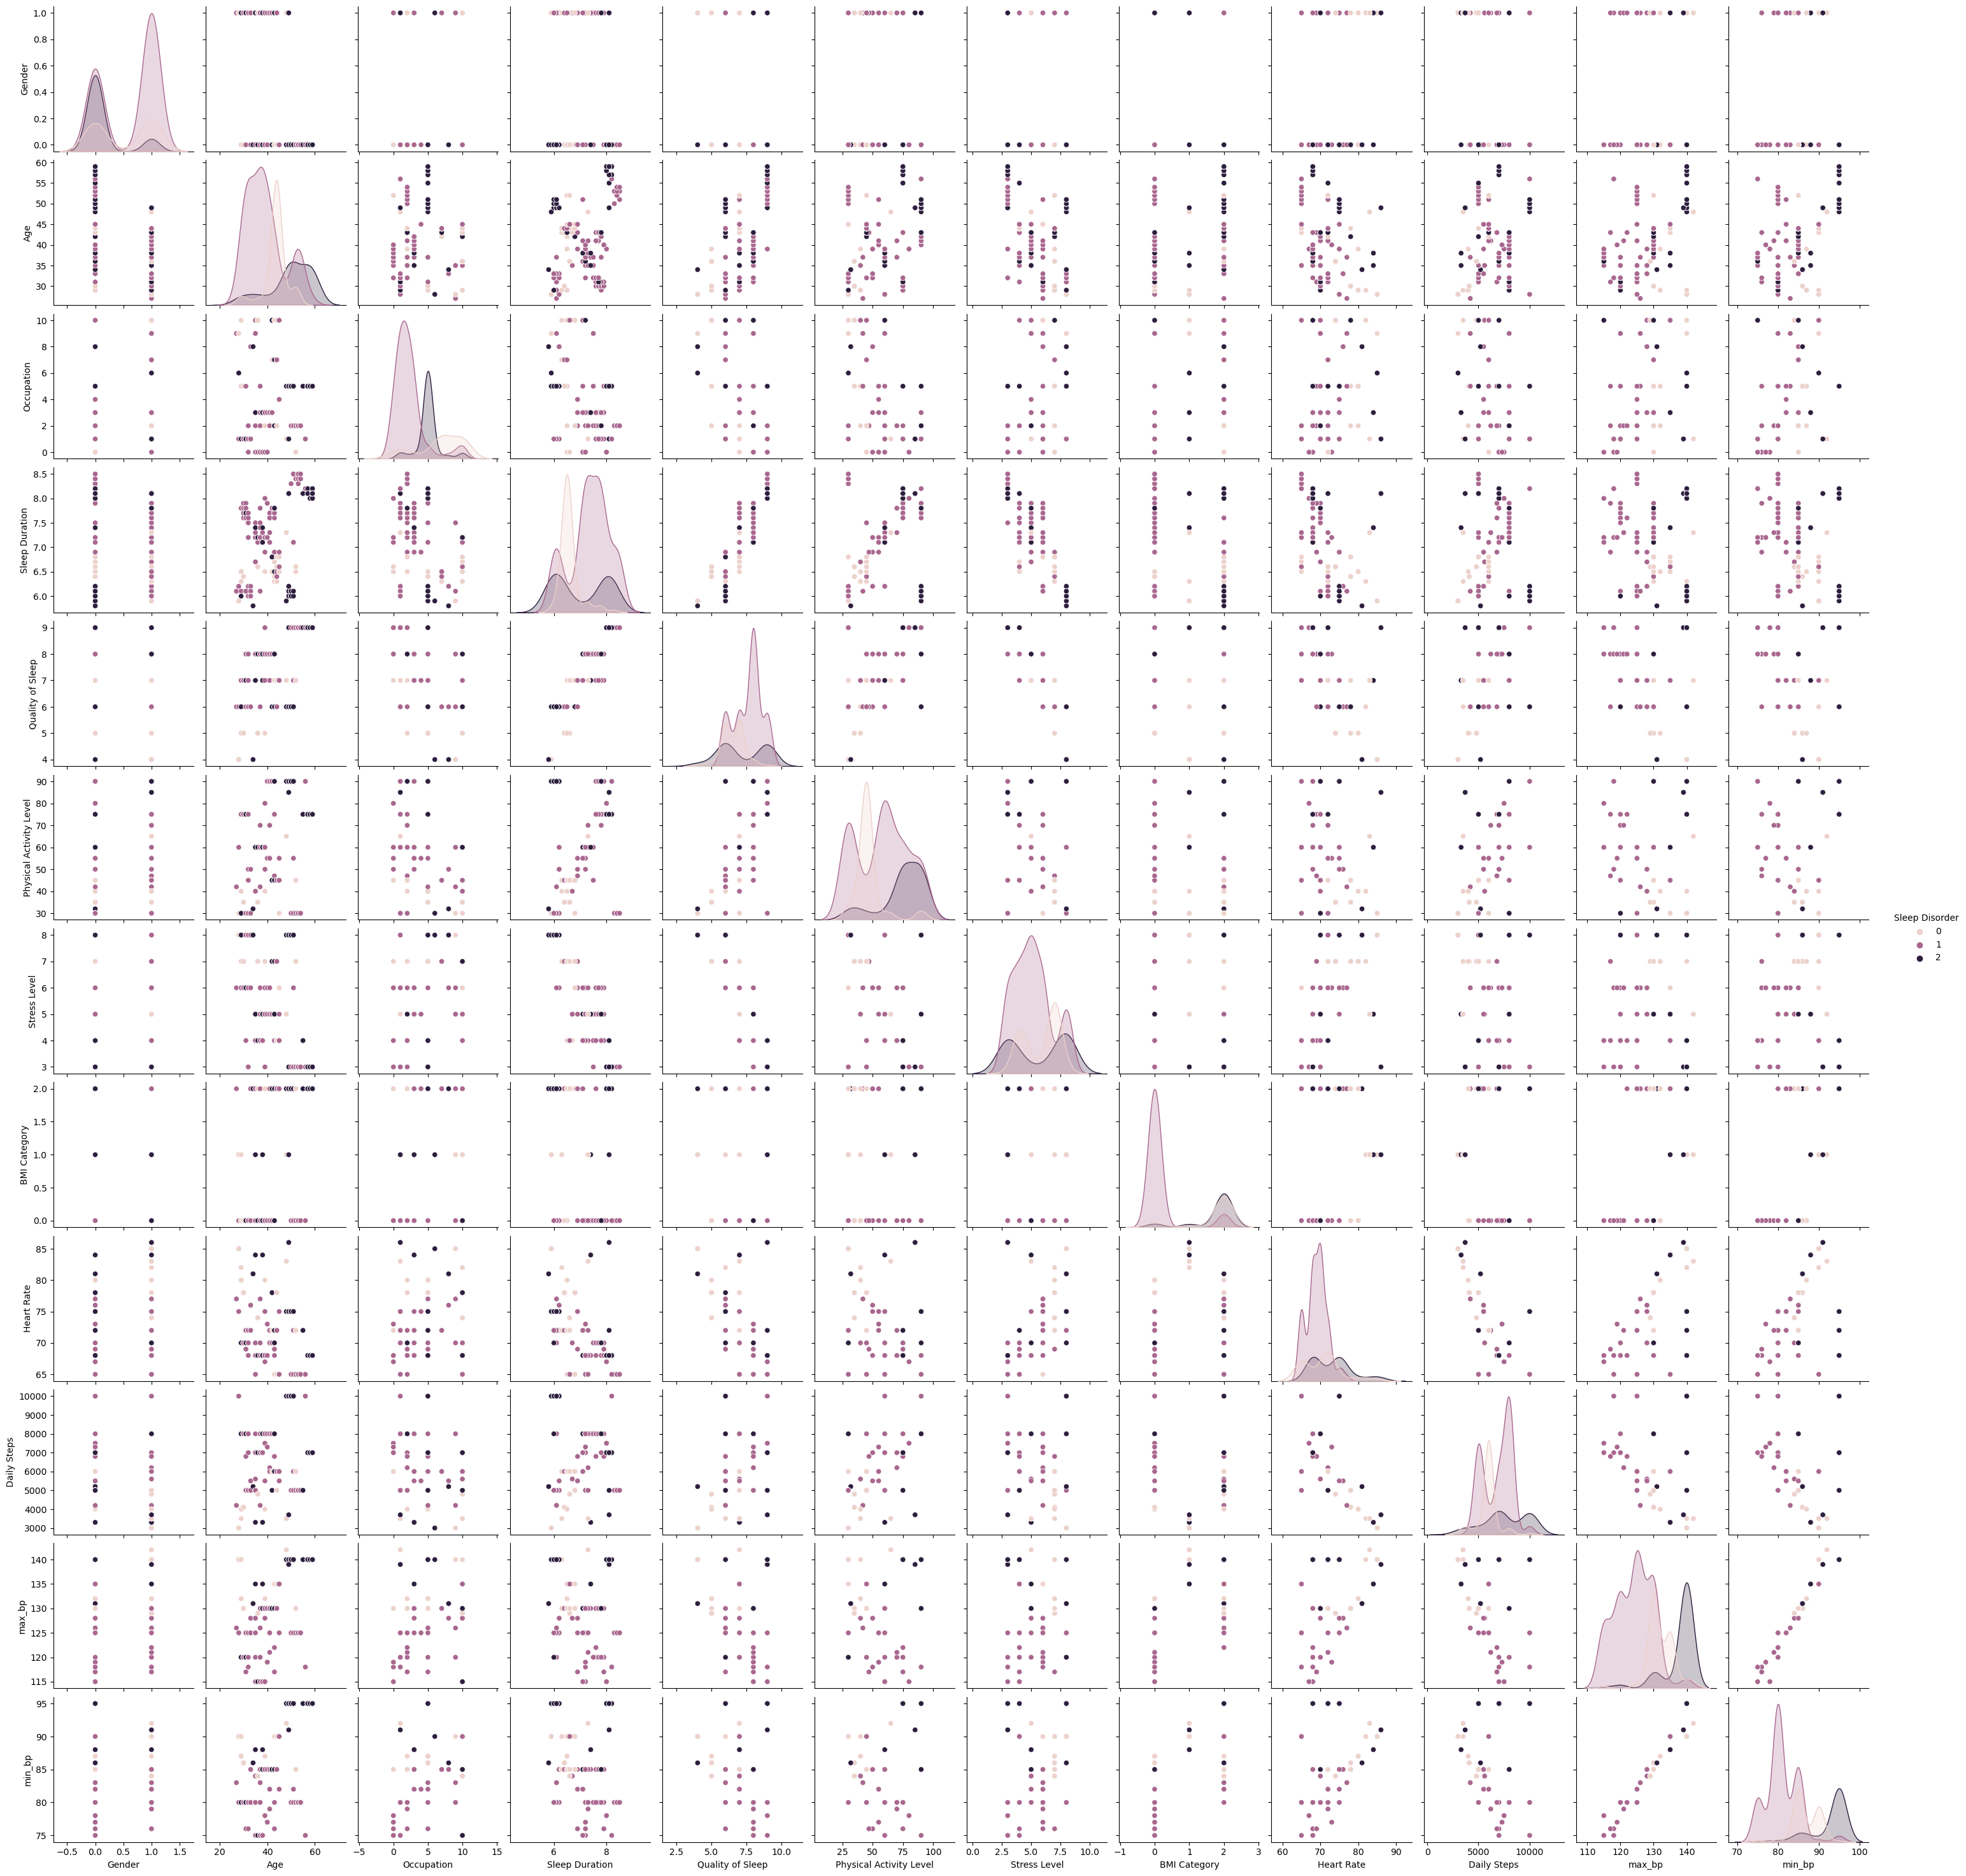

In [82]:
sns.pairplot(df,hue="Sleep Disorder")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
model.score(X_train, y_train)

0.936

In [37]:
y_preds = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_preds)

array([[65,  0,  1],
       [ 5, 23,  3],
       [ 4,  2, 21]], dtype=int64)

In [39]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        66
           1       0.92      0.74      0.82        31
           2       0.84      0.78      0.81        27

    accuracy                           0.88       124
   macro avg       0.88      0.83      0.85       124
weighted avg       0.88      0.88      0.88       124



In [40]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,max_bp,min_bp
0,1,27,8,6.1,6,42,6,2,77,4200,0,126,83
1,1,28,2,6.2,6,60,8,1,75,10000,0,125,80
2,1,28,2,6.2,6,60,8,1,75,10000,0,125,80
3,1,28,10,5.9,4,30,8,3,85,3000,1,140,90
4,1,28,10,5.9,4,30,8,3,85,3000,1,140,90


In [41]:
df.shape

(374, 13)

In [42]:
a= X.loc[0].values

In [43]:
a = a.reshape(1,-1)

In [44]:
model.predict(a)

c:\Users\abhip\miniconda3\envs\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [45]:
model

RandomForestClassifier(random_state=42)

In [46]:
import pickle

In [48]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)